In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
#Load dataset
athletes = pd.read_csv('/Users/latabidary/application/athlete_events.csv')
regions = pd.read_csv('/Users/latabidary/application/noc_regions.csv')

In [4]:
athletes.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
#Join the dataframe
ath_df = athletes.merge(regions, how = 'left',on = 'NOC')
ath_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
ath_df.shape

(271116, 17)

In [14]:
#colum name consistent
ath_df.rename(columns ={'region':'Region', 'notes':'Notes'}, inplace = True)
ath_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [15]:
ath_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [16]:
#Check null value
nan_value = ath_df.isna()
nan_columns = nan_value.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [17]:
ath_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [18]:
#Print the columns name containing null values or missing values in the form of a list

In [20]:
#India details
ath_df.query('Team == "India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [21]:
ath_df.query('Team == "Nepal"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
1692,939,Kamal Bahadur Adhikari,M,31.0,163.0,69.0,Nepal,NEP,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Men's Lightweight,NaN,Nepal,NaN
12597,6866,Sangina Baidya,F,29.0,161.0,48.0,Nepal,NEP,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Flyweight,NaN,Nepal,NaN
15715,8469,Arjun Kumar Basnet,M,32.0,171.0,58.0,Nepal,NEP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's Marathon,NaN,Nepal,NaN
15716,8470,Krishna Bahadur Basnet,M,29.0,168.0,58.0,Nepal,NEP,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's Marathon,NaN,Nepal,NaN
15717,8471,Laxman Basnet,M,23.0,162.0,50.0,Nepal,NEP,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN,Nepal,NaN


In [23]:
#Top countries participating
top_10_countries = ath_df.Team.value_counts().sort_values(ascending = False).head(10)
top_10_countries 


United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

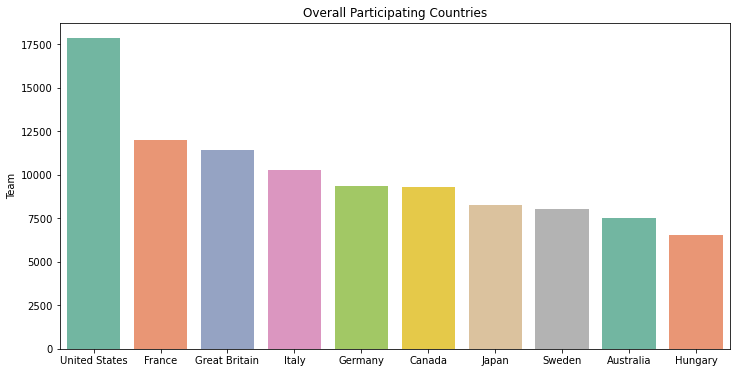

In [25]:
plt.figure(figsize = (12,6))
plt.title("Overall Participating Countries")
sns.barplot(x = top_10_countries.index, y= top_10_countries, palette = 'Set2');

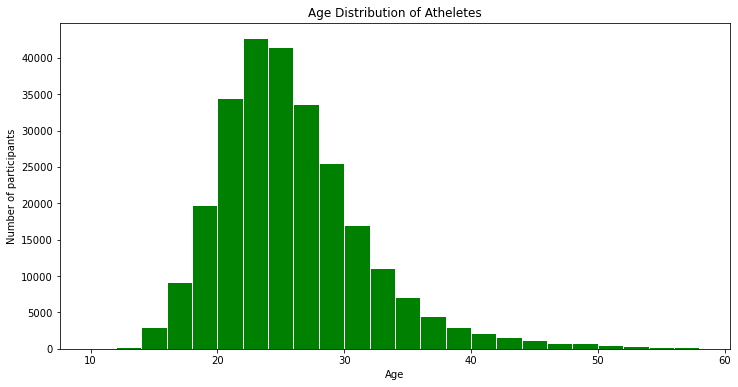

In [33]:
#Age distribution of participants
plt.figure(figsize = (12,6))
plt.title("Age Distribution of Atheletes")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.hist(ath_df.Age, np.arange(10,60,2), color = 'green', edgecolor = 'white');

In [36]:
winter_sports = ath_df[ath_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [37]:
summer_sports = ath_df[ath_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [38]:
#Male and Female Participants
gender_counts = ath_df.Sex.value_counts()
gender_counts


M    196594
F     74522
Name: Sex, dtype: int64

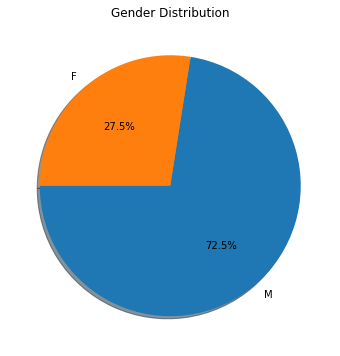

In [40]:
plt.figure(figsize = (12,6))
plt.title("Gender Distribution")
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 180, shadow = True);

In [43]:
#Total Medal
ath_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [45]:
#Total number of female athletes in each olympics
female_participants = ath_df[(ath_df.Sex == 'F')&(ath_df.Season =='Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [46]:
womenOlympics = ath_df[(ath_df.Sex =='F')& (ath_df.Season == 'Summer')]

Text(0.5, 1.0, 'Women Participation')

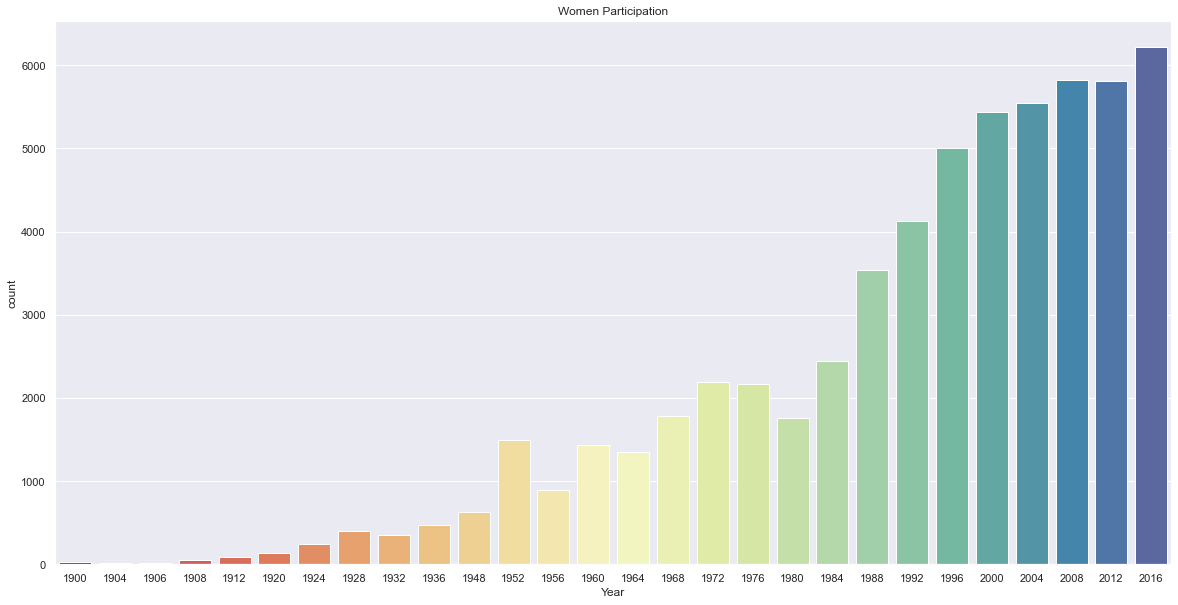

In [47]:
sns.set(style = "darkgrid")
plt.figure(figsize = (20,10))
sns.countplot(x = "Year", data = womenOlympics, palette = "Spectral")
plt.title("Women Participation")

Text(0.5, 1.0, 'Plot of female athletcs over time')

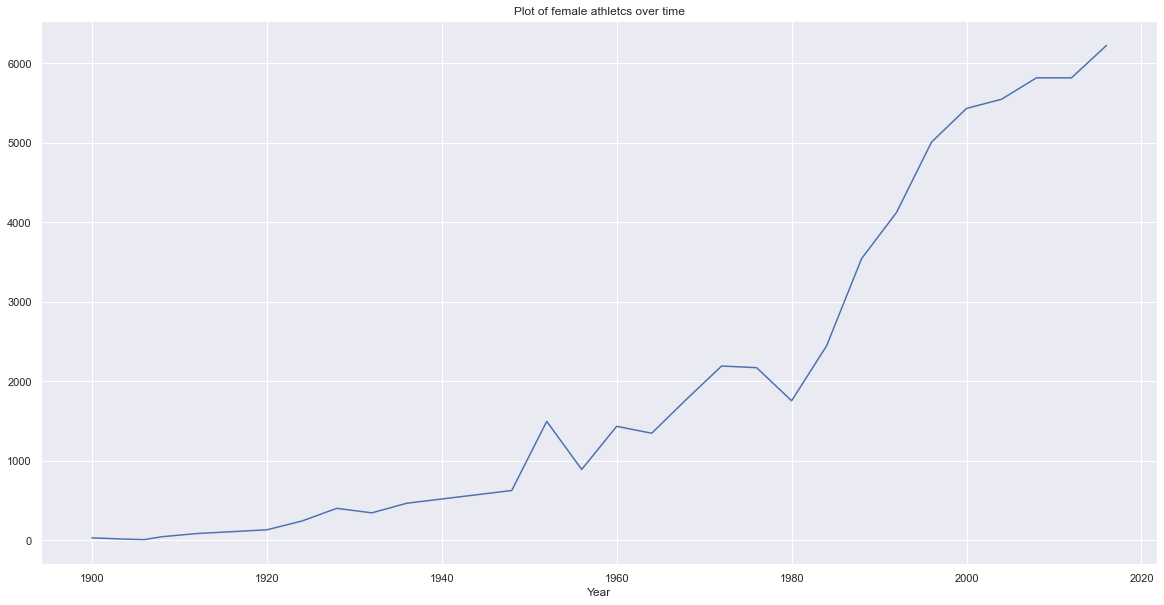

In [48]:
part = womenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize = (20,10))
part.loc[:,'F'].plot()
plt.title("Plot of female athletcs over time")

In [49]:
#Gold medal athletes
goldMedals = ath_df[(ath_df.Medal == "Gold")]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [50]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [51]:
goldMedals['ID'][goldMedals['Age']> 60].count()

6

In [52]:
sport_event = goldMedals['Sport'][goldMedals['Age'] > 60]
sport_event 

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

/Users/latabidary/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gold Medal For Athelets over 60')

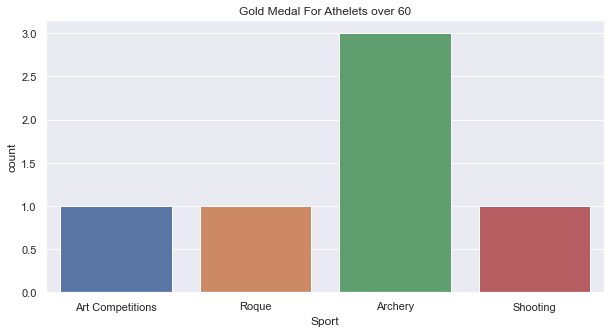

In [53]:
#plot sport event
plt.figure(figsize = (10,5))
plt.tight_layout()
sns.countplot(sport_event)
plt.title("Gold Medal For Athelets over 60")

In [55]:
#Gold Medal from each country
goldMedals.Region.value_counts().reset_index(name = 'Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Gold Medals Per Country')

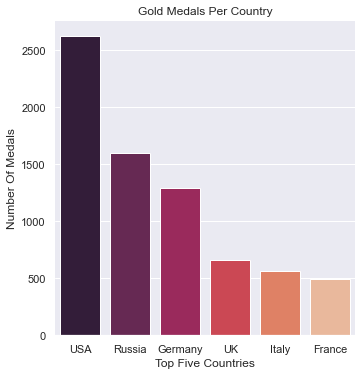

In [58]:
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name = 'Medal').head(6)
g = sns.catplot(x = "index", y ="Medal", data = totalGoldMedals, height = 5, kind = "bar", palette = "rocket")
g.despine(left = True)
g.set_xlabels("Top Five Countries")
g.set_ylabels("Number Of Medals")
plt.title("Gold Medals Per Country")

In [61]:
#Rio olympics
max_year = ath_df.Year.max()
print(max_year)
team_names = ath_df[(ath_df.Year == max_year) &(ath_df.Medal == 'Gold')].Team
team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

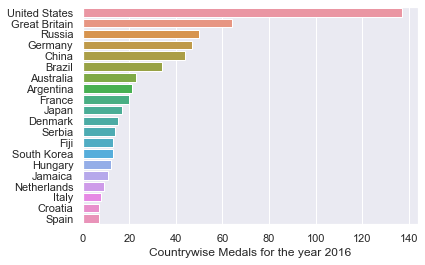

In [63]:
sns.barplot(x = team_names.value_counts().head(20), y = team_names.value_counts().head(20).index)
plt.ylabel(None);
plt.xlabel("Countrywise Medals for the year 2016");

In [64]:
not_null_medals = ath_df[(ath_df['Height'].notnull()) & (ath_df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of Olympics Medalist')

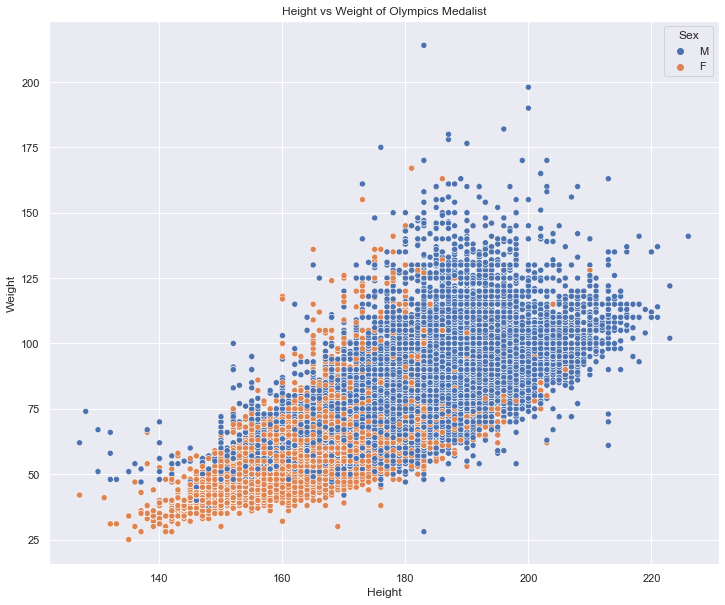

In [67]:
plt.figure(figsize =(12,10))
axis = sns.scatterplot(x = "Height", y ="Weight",data = not_null_medals,  hue = "Sex")
plt.title("Height vs Weight of Olympics Medalist")